# Linear regression and basic Python libraries for data analysis and scientific computing

This assignment is about linear regression. Using the example of predicting a person's height by his weight, you will see what mathematics is behind this, and at the same time you will get acquainted with the basic Python libraries necessary for further course completion.

**Materials**

- Lectures of this course on linear models and gradient descent
- [Documentation](http://docs.scipy.org/doc/) for NumPy и SciPy
- [Documentation](http://matplotlib.org/) for Matplotlib 
- [Documentation](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) for Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Documentation](http://stanford.edu/~mwaskom/software/seaborn/) for Seaborn 

## Task 1. Primary data analysis with Pandas

In this task we will use [SOCR] data (http://wiki.stat.ucla.edu/sokr/index.php/SOCK_Data_Dinov_020108_HeightsWeights ) by height and weight 25 thousand teenagers.

**[1].** If you do not have the Seaborn library installed, run the *conda install seaborn* command in the terminal. (Seaborn is not included in the Anaconda build, but this library provides convenient high-level functionality for data visualization).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We count the height and weight data (*weight_height.csv* attached in the task) into the Pandas DataFrame object:

In [3]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Most often, the first thing to do after reading the data is to look at the first few records. So you can catch data reading errors (for example, if instead of 10 columns you get one with 9 semicolons in its name). It also allows you to get acquainted with the data, at least look at the signs and their nature (quantitative, categorical, etc.). 

After that, it is worth building histograms of the distribution of signs - this again allows you to understand the nature of the sign (its power distribution, or normal, or some other). Also, thanks to the histogram, you can find some values that are very different from others - "outliers" in the data. 
It is convenient to build histograms using the *plot* Pandas DataFrame method with the *kind='ist'* argument.

**Example.** Let's build a histogram of the distribution of the growth of adolescents from the sample *data*. We use the *plot* method for Data Frame *data* with arguments *y='Height'* (this is the attribute whose distribution we are building)

<AxesSubplot:title={'center':'Height (inch.) distribution'}, ylabel='Frequency'>

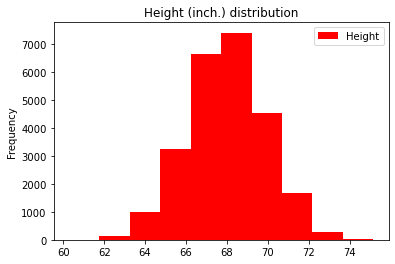

In [4]:
data.plot(y='Height',
          kind='hist', 
          color='red',
          title='Height (inch.) distribution')

Arguments:

- *y='Height'* is the attribute whose distribution we are building
- *kind='ist'* - means that a histogram is being built
- *color='red'* - color

**[2]**. Look at the first 5 entries using the *head method* Pandas DataFrame. Draw a histogram of the weight distribution using the *plot* Pandas DataFrame method. Make the histogram green, sign the picture.

In [5]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<AxesSubplot:title={'center':'Weight distribution'}, ylabel='Frequency'>

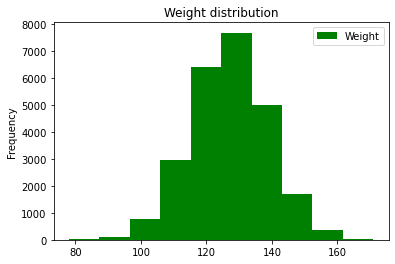

In [6]:
data.plot(y='Weight',
          kind='hist',
          color='green',
          title='Weight distribution' )

One of the effective methods of primary data analysis is the display of pairwise dependencies of features. $m\times m$ graphs are created (*m* is the number of features), where histograms of the distribution of features are drawn diagonally, and scatter plots of the dependencies of two features are drawn outside the diagonal. This can be done using the $scatter\_matrix$ Pandas Data Frame method or the *pairplot* of the Seaborn library. 

To illustrate this method, it is more interesting to add a third feature. Create a feature *Body Mass Index* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index )). To do this, we will use a convenient bundle of the *apply* Pandas DataFrame method and Python lambda functions.

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

**[3].** Build a picture on which the pairwise dependencies of the features, 'Height', 'Weight' and 'BMI' from each other will be displayed. Use the *pairplot* method of the Seaborn library.

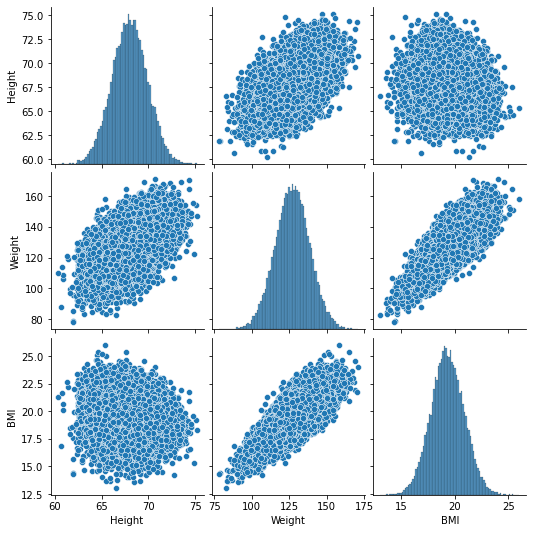

In [9]:
sns.pairplot(data)

Often, in the initial analysis of data, it is necessary to investigate the dependence of some quantitative attribute on a categorical one (for example, salary on the gender of an employee). The "boxes with moustaches" - boxplots of the Seaborn library will help in this. Boxplot is a compact way to show statistics of a real feature (mean and quartiles) for different values of a categorical feature. It also helps to track "outliers" - observations in which the value of this material feature is very different from others.

**[4]**. Create a new *weight_category* attribute in the DataFrame *data*, which will have 3 values: 1 – if the weight is less than 120 pounds. (~ 54 kg.), 3 - if the weight is greater than or equal to 150 pounds (~68 kg.), 2 – in other cases. Build a "box with a mustache" (boxplot), demonstrating the dependence of height on weight category. Use the *boxplot* method of the Seaborn library and the *apply* Pandas DataFrame method. Label the *y* axis with the "Height" label, and the *x* axis with the "Weight category" label.

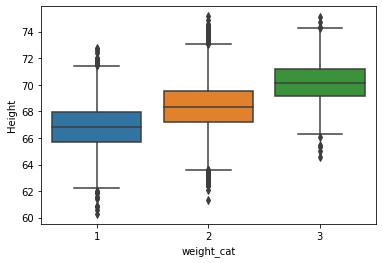

In [10]:
def weight_category(weight):
    if weight < 120:
        return 1
    else:
        if weight >= 150:
            return 3
        else:
            return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
ax = sns.boxplot(x=data.weight_cat, y=data.Height)

**[5].** Build a scatterplot of height versus weight using the *plot* method for Pandas DataFrame with the argument *kind='scatter'*. Sign the picture.

<AxesSubplot:title={'center':'Dependence of height on weight'}, xlabel='Weight', ylabel='Height'>

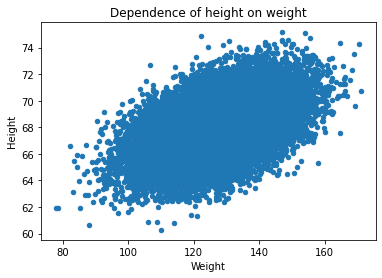

In [11]:
data.plot(kind='scatter', x='Weight', y='Height', title='Dependence of height on weight')

## Task 2. Minimizing the quadratic error

In the simplest formulation, the problem of predicting the value of a real feature by other features (the regression recovery problem) is solved by minimizing the quadratic error function. 

**[6].** Write a function that, using two parameters $w_0$ and $w_1$, calculates the quadratic error of approximating the dependence of the growth of $y$ on the weight of $x$ with a straight line $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Here $n$ is the number of observations in the dataset, $y_i$ and $x_i$ are the height and weight of the $i$th person in the dataset.

In [12]:
def error(w):
    return ((data['Height']-(w[0]+w[1]*data['Weight']))**2).sum()

So, we solve the problem: how to draw a straight line through the cloud of points corresponding to the observations in our data set in the space of the signs "Height" and "Weight" so as to minimize the functionality from clause 6. First, let's display at least some straight lines and make sure that they poorly convey the dependence of height on weight.

**[7].** Draw two straight lines on the graph from item 5 of Task 1 corresponding to the values of the parameters ($w_0, w_1) = (60, 0.05)$ and ($w_0, w_1) = (50, 0.16)$. Use the *plot* method from *matplotlib.pyplot*, as well as the *linspace* method of the NumPy library. Sign the axes and the graph.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Dependence of height on weight')

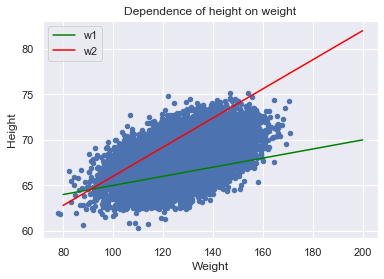

In [24]:
data.plot(kind='scatter', x='Weight', y='Height', title='Dependence of height on weight')

def line(w, x):
    return w[0]+w[1]*x

x = np.linspace(80, 200, 1000)
w1 = [60, 0.05]
w2 = [50, 0.16]
plt.plot(x, line(w1,x), color='green')
plt.plot(x, line(w2,x), color='red')

plt.xlabel('Weight')
plt.ylabel('Height')

plt.legend(('w1','w2'))

plt.title('Dependence of height on weight')

plt.show()

Minimizing the quadratic error function is a relatively simple task, since the function is convex. There are many optimization methods for such a task. Let's see how the error function depends on one parameter (the slope of the straight line), if the second parameter (the free term) is fixed.

**[8].** Plot the dependence of the error function calculated in clause 6 on the parameter $w_1$ at $w_0$ = 50. Sign the axes and the graph.

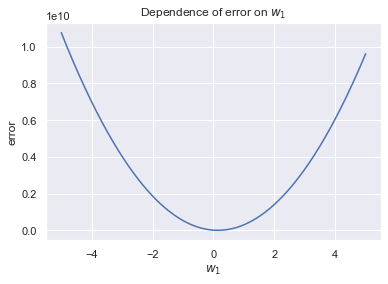

In [26]:
w1 = np.linspace(-5,5,1000)
plt.plot(w1, [error([50,i]) for i in w1])

plt.xlabel("$w_1$")
plt.ylabel('error')
plt.title('Dependence of error on $w_1$')

plt.show()

Now, using the optimization method, we will find the "optimal" slope of the straight line, approximating the dependence of height on weight, with a fixed coefficient $w_0 = 50$.

**[9].** Using the *minimize_scalar* method from *scipy.optimize*, find the minimum of the function defined in clause 6 for the values of the parameter $w_1$ in the range [-5,5]. Draw on the graph from item 5 of Task 1 a straight line corresponding to the values of the parameters ($w_0$, $w_1$) = (50, $w_{1\_opt}$), where $w_{1\_opt}$ is the optimal value of the parameter $w_1$ found in item 8.

In [27]:
from scipy.optimize import minimize_scalar

def error_opt(w1):
    return error([50,w1])

res = minimize_scalar(error_opt, bounds=(-5,5), method='bounded')
w1_opt = res.x

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


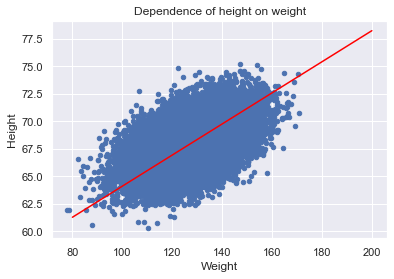

In [29]:
data.plot(kind='scatter', x='Weight', y='Height', title='Dependence of height on weight')
x = np.linspace(80, 200, 1000)

w_opt = [50, w1_opt]
plt.plot(x, line(w_opt,x), color = 'red')

plt.xlabel('Weight')
plt.ylabel('Height')

plt.title('Dependence of height on weight')

plt.show()

When analyzing multidimensional data, a person often wants to get an intuitive understanding of the nature of data through visualization. Alas, when the number of signs is more than 3, it is impossible to draw such pictures. In practice, to visualize data in 2D and 3D, 2 or, respectively, 3 main components are selected in the data (we will see exactly how this is done later in the course) and display data on a plane or in volume. 

Let's see how to draw 3D pictures in Python, using the example of displaying the function $z(x,y) = sin(\sqrt{x^2+y^2})$ for the values of $x$ and $y$ from the interval [-5,5] with a step of 0.25.

In [30]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

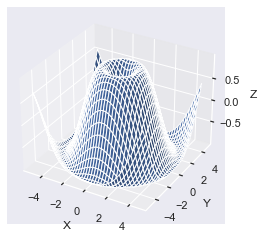

In [31]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Creating NumPy arrays with coordinates of points along the X and Y axes. 
# We use the meshgrid method, in which by coordinate vectors 
# a coordinate matrix is created. We set the desired function Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Finally, we use the *plot_surface* method of the object 
# of the Axes3DSubplot type. We also sign the axes.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Build a 3D graph of the dependence of the error function calculated in clause 6 on the parameters $w_0$ and $w_1$. Label the $x$ axis with the "Intercept" label, the $y$ axis with the "Slope" label, and the $z$ axis with the "Error" label.

In [32]:
w0 = np.linspace(-100, 100, 100)
w1 = np.linspace(-5, 5, 100)
z = []
for i in w0:
    stroka = []
    for j in w1:
        stroka.append(error([i,j]))
    z.append(stroka)
w0, w1 = np.meshgrid(w0,w1)

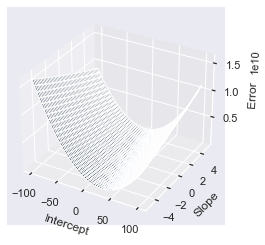

In [33]:
#%matplotlib widget
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(w0, w1, np.array(z))
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

**[11].** Using the *minimize* method from scipy.optimize, find the minimum of the function defined in clause 6 for the parameter values $w_0$ in the range [-100,100] and $w_1$ in the range [-5, 5]. The starting point is ($w_0$, $w_1$) = (0, 0). Use the optimization method L-BFGS-B (the method argument of the minimize method). Draw a straight line on the graph from item 5 of Task 1 corresponding to the found optimal values of the parameters $w_0$ and $w_1$. Sign the axes and the graph.

In [34]:
from scipy.optimize import minimize
result = minimize(error, (0,0), method = 'L-BFGS-B', bounds = ([-100,100],[-5,5]))

error_opt3d = result.x

In [35]:
print (error_opt3d[1])

0.08200645837777404


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


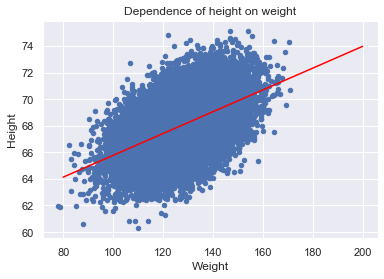

In [36]:
data.plot(kind='scatter',x='Weight',y='Height', title='Dependence of height on weight')

w_opt = [error_opt3d[0], error_opt3d[1]]
plt.plot(x, line(w_opt,x), color = 'red')

plt.xlabel('Weight')
plt.ylabel('Height')

plt.title('Dependence of height on weight')

plt.show()

## Job evaluation criteria

- Is the IPython notebook executed without errors? (15 points)
- Is the histogram of the growth distribution from item 2 displayed correctly? (3 points). Are the signatures drawn up correctly? (1 point)
- Are the pairwise dependencies of the features from item 3 correctly displayed? (3 points). Are the signatures drawn up correctly? (1 point)
- Is the dependence of height on weight category from item 4 correctly displayed? (3 points). Are the signatures drawn up correctly? (1 point)
- Is the scatter plot of height from weight from item 5 displayed correctly? (3 points). Are the signatures drawn up correctly? (1 point)
- Is the function of calculating the quadratic error from clause 6 implemented correctly? (10 points)
- Is the graph from item 7 drawn correctly? (3 points) Are the signatures drawn correctly? (1 point)
- Is the graph from item 8 drawn correctly? (3 points) Are the signatures drawn correctly? (1 point)
- Is the minimize\_scalar method from scipy.optimize used correctly? (6 points). Is the graph from item 9 drawn correctly? (3 points) Are the signatures drawn correctly? (1 point)
- Is the 3D graph from item 10 drawn correctly? (6 points) Are the signatures drawn up correctly? (1 point)
- Is the minimize method from scipy.optimize used correctly? (6 points). Is the graph from item 11 drawn correctly? (3 points). Are the signatures drawn up correctly? (1 point)